# Camunda 8 Workers:
## Comparing Power Consumption in Idle

These Measurements were done with Kepler on `restworkerjava`. Scrape interval was **30 seconds**, measuring window was **21 minutes**

*Author: Jan Wittrowski*

### Learnings

- set_index("name") only in final df, otherwise concat-errors

### Cheatsheet

```df.loc[row, col]```


## Importing, Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read first CSV containing idle measurement 1-7
rawdata = pd.read_csv("CSV/idle_1_7_all_pods_power.csv", 
                     header=1 # which row contains column headers
                    ) # which column contains labels

# read 2nd CSV cotaining idle measurementes 8-14
rawdata2 = pd.read_csv("CSV/idle_8_14_all_pods_power.csv", 
                     header=1 # which row contains column headers
                    ) # which column contains labels

# read 3rd CSV containing idle measurements 15 and 16
rawdata3 = pd.read_csv("CSV/idle_15_16_all_pods_power.csv", 
                      header=1 # which row contains column headers
                     ) # which column contains labels

rawdata


,Time,bpmndeployment-8l9w6 / camunda8 / PKG,camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG,camunda-platform-elasticsearch-master-0 / camunda8 / PKG,camunda-platform-elasticsearch-master-1 / camunda8 / PKG,camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG,camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG,...,load-controller-5445f6d748-hgqvd / worker / OTHER,load-controller-54c5b8b98-pkxhj / worker / OTHER,restworkerjava-56655bdb84-tndnx / worker / OTHER,restworkerjava-5bff59f95d-5ghvj / worker / OTHER,restworkerjava-67c4cdf457-bc649 / worker / OTHER,restworkerjava-687b67c59f-g7szb / worker / OTHER,restworkerjava-7949956cf9-xgkss / worker / OTHER,restworkerjava-7b6d76448-d7k55 / worker / OTHER,restworkerjava-7bf68d4499-2p867 / worker / OTHER,restworkerjava-f54f67586-6k8q5 / worker / OTHER
0,2023-11-28 14:15:00,0.188,0.201,0.463,0.460,0.227,0.188,1.30,0.424,0.191,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-11-28 14:15:30,0.188,0.202,0.458,0.441,0.219,0.188,1.22,0.384,0.191,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-28 14:16:00,0.188,0.200,0.448,0.452,0.227,0.188,1.16,0.382,0.191,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-11-28 14:16:30,0.188,0.199,0.415,0.415,0.211,0.188,1.02,0.350,0.191,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-28 14:17:00,0.188,0.200,0.435,0.436,0.221,0.188,1.08,0.362,0.191,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2023-11-28 17:33:00,0.188,0.203,0.416,0.427,0.216,0.188,1.33,0.407,0.191,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
397,2023-11-28 17:33:30,0.188,0.204,0.415,0.432,0.219,0.188,1.45,0.432,0.192,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
398,2023-11-28 17:34:00,0.188,0.204,0.415,0.428,0.216,0.188,1.33,0.410,0.191,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
399,2023-11-28 17:34:30,0.188,0.205,0.415,0.428,0.218,0.188,1.39,0.421,0.192,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [2]:
#concatenate both df

rawdata = pd.concat([rawdata, rawdata2, rawdata3], axis=0, join="outer")

rawdata = rawdata.set_index("Time")

rawdata

,bpmndeployment-8l9w6 / camunda8 / PKG,camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG,camunda-platform-elasticsearch-master-0 / camunda8 / PKG,camunda-platform-elasticsearch-master-1 / camunda8 / PKG,camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG,camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG,processstart-xb5jm / camunda8 / PKG,...,restworkerjava-77c95dd488-5z6bl / worker / OTHER,restworkerjava-7f99bf486d-5rv2m / worker / OTHER,restworkerjava-86b6d57d68-95jmw / worker / OTHER,restworkerjava-fdcf7776b-dt2lz / worker / OTHER,restworkerjava-86b6d57d68-z6cv2 / worker / PKG,restworkerjava-cb56d4547-dndnt / worker / PKG,restworkerjava-86b6d57d68-z6cv2 / worker / DRAM,restworkerjava-cb56d4547-dndnt / worker / DRAM,restworkerjava-86b6d57d68-z6cv2 / worker / OTHER,restworkerjava-cb56d4547-dndnt / worker / OTHER
Time,,,,,,,,,,,,,,,,,,,,,
2023-11-28 14:15:00,0.188,0.201,0.463,0.460,0.227,0.188,1.300,0.424,0.191,0.188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:15:30,0.188,0.202,0.458,0.441,0.219,0.188,1.220,0.384,0.191,0.188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:00,0.188,0.200,0.448,0.452,0.227,0.188,1.160,0.382,0.191,0.188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:30,0.188,0.199,0.415,0.415,0.211,0.188,1.020,0.350,0.191,0.188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:17:00,0.188,0.200,0.435,0.436,0.221,0.188,1.080,0.362,0.191,0.188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 11:43:00,0.180,0.219,0.536,0.533,0.262,0.221,3.010,0.756,0.187,0.180,...,NaN,NaN,NaN,NaN,NaN,0.197,NaN,0.0193,NaN,0.0
2023-11-30 11:43:30,0.180,0.191,0.411,0.412,0.203,0.195,0.948,0.332,0.182,0.180,...,NaN,NaN,NaN,NaN,NaN,0.185,NaN,0.0189,NaN,0.0
2023-11-30 11:44:00,0.180,0.189,0.401,0.401,0.200,0.190,0.840,0.312,0.183,0.180,...,NaN,NaN,NaN,NaN,NaN,0.185,NaN,0.0190,NaN,0.0


In [3]:
# add all columns containing restworkerjava and PKG
pkg_columns_to_keep = [col for col in rawdata.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'PKG'])]

# add all columns containing restworkerjava and DRAM
dram_columns_to_keep = [col for col in rawdata.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'DRAM'])]

# add zeebe columns, ignore tasklist, operate, console-worker, processstart, bpmndeployment, elasticsearch
camunda_columns_to_keep = rawdata.columns[rawdata.columns.str.contains('camunda8') & ~rawdata.columns.str.contains('OTHER|console-worker|tasklist|operate|bpmndeployment|processstart|elasticsearch|connectors')]

relevant_data = pd.concat([rawdata[pkg_columns_to_keep], rawdata[dram_columns_to_keep], rawdata[camunda_columns_to_keep]], axis=1)


In [4]:
frames = []

for col in pkg_columns_to_keep:
    
    first_index = relevant_data[col].first_valid_index()
    last_index = relevant_data[col].last_valid_index()
    
    frame = pd.DataFrame(relevant_data.loc[first_index:last_index,:])

    # drop NaNs
    frame = frame.dropna(axis=1, how='all')

    frame.columns = [
        'worker pkg',
        'worker dram',
        'zeebe pkg',
        'zeebegateway pkg',
        'zeebe dram',
        'zeebegateway dram',
        ]

    frames.append(frame)
    
frames[3]

,worker pkg,worker dram,zeebe pkg,zeebegateway pkg,zeebe dram,zeebegateway dram
Time,,,,,,
2023-11-28 15:50:00,0.196,0.0170,1.28,0.399,0.0228,0.0194
2023-11-28 15:50:30,0.210,0.0204,1.26,0.396,0.0222,0.0195
2023-11-28 15:51:00,0.196,0.0172,1.30,0.402,0.0230,0.0196
2023-11-28 15:51:30,0.197,0.0173,1.21,0.388,0.0227,0.0195
2023-11-28 15:52:00,0.197,0.0171,1.27,0.396,0.0224,0.0192
2023-11-28 15:52:30,0.198,0.0175,1.20,0.385,0.0229,0.0194
2023-11-28 15:53:00,0.196,0.0171,1.25,0.396,0.0229,0.0195
2023-11-28 15:53:30,0.198,0.0176,1.36,0.414,0.0227,0.0197
2023-11-28 15:54:00,0.196,0.0171,1.26,0.395,0.0222,0.0195


# Average Power Consumption In Idle

In [5]:
sum_power = pd.DataFrame()

for frame in frames:

    # sum up all measurements in time series
    frame_sums = frame.sum(axis=0)
    
    # add time interval in Min
    frame_sums.at['length'] = len(frame.index) / 2

    # combine pkg + dram levels
    frame_sums.at['worker sum'] = frame_sums.iloc[0] + frame_sums.iloc[1]
    
    # generate average worker consumption in W
    frame_sums.at['worker avg per min'] = frame_sums['worker sum'] / frame_sums['length']

    # sum up all zeebe-measurements
    frame_sums.at['zeebe sum'] = frame_sums[2:8].sum()

    # generate average zeebe consumption in W
    frame_sums.at['zeebe avg per min'] = frame_sums['zeebe sum'] / frame_sums['length']

    # use start time as column name and add series to frame
    sum_power[frame.index[0]] = frame_sums
     

sum_power = sum_power.sort_index(axis=1)

sum_power

,2023-11-28 14:15:00,2023-11-28 14:43:30,2023-11-28 15:05:30,2023-11-28 15:28:00,2023-11-28 15:50:00,2023-11-28 16:15:30,2023-11-28 16:51:00,2023-11-28 17:15:30,2023-11-29 10:09:30,2023-11-29 10:32:30,2023-11-29 11:00:30,2023-11-29 11:31:30,2023-11-29 11:53:00,2023-11-29 12:15:00,2023-11-29 12:37:00,2023-11-29 12:58:30,2023-11-30 10:39:30,2023-11-30 11:19:00
worker pkg,10.908000,8.433000,8.639000,8.457000,9.842000,14.528000,9.407000,7.911000,8.456000,10.234000,11.291000,8.000000,9.107000,8.381000,7.648000,6.613000,14.488000,9.822000
worker dram,0.963000,0.738100,0.753000,0.741900,0.860800,1.267300,0.817400,0.707300,0.768400,0.945800,1.038100,0.734200,0.788000,0.762900,0.721700,0.622700,1.435900,0.965800
zeebe pkg,59.898000,43.686000,53.810000,56.600000,67.460000,104.300000,59.890000,56.130000,27.594000,38.881000,38.861000,30.208000,32.379000,31.186000,38.526000,29.286000,57.380000,45.139000
zeebegateway pkg,20.121000,15.096000,17.102000,17.487000,20.570000,30.796000,18.853000,16.960000,12.504000,15.961000,16.798000,12.395000,12.747000,12.453000,13.636000,10.657000,23.070000,16.807000
zeebe dram,1.230600,0.850300,0.876400,0.994900,1.138300,1.793900,0.905200,0.990600,0.868900,1.316600,1.146000,0.848100,0.933200,0.797500,0.955700,0.708500,1.518200,1.067500
zeebegateway dram,1.065500,0.769300,0.792700,0.843000,0.969100,1.397200,0.843300,0.815900,0.836200,1.157300,1.088200,0.795000,0.815900,0.761400,0.847500,0.647300,1.480900,1.011500
length,28.000000,21.500000,22.000000,21.500000,25.000000,35.000000,24.000000,20.000000,22.500000,27.500000,30.500000,21.500000,21.500000,21.500000,21.000000,17.000000,39.000000,26.500000
worker sum,11.871000,9.171100,9.392000,9.198900,10.702800,15.795300,10.224400,8.618300,9.224400,11.179800,12.329100,8.734200,9.895000,9.143900,8.369700,7.235700,15.923900,10.787800
worker avg per min,0.423964,0.426563,0.426909,0.427856,0.428112,0.451294,0.426017,0.430915,0.409973,0.406538,0.404233,0.406242,0.460233,0.425298,0.398557,0.425629,0.408305,0.407087
zeebe sum,122.186100,91.072700,103.973100,106.623800,125.840200,189.082400,114.715900,103.514800,73.527500,95.995700,100.722300,74.480300,78.270100,75.841800,83.334900,65.534500,138.373000,101.312800


**rto** = ``requestTimeOut`` - the amount of time zeebe keeps a poll open | **pi** = ``pollInterval`` - the amount of time a poll will wait after closing before polling again

| V RTO / PI > | 2     | 10    | 30    | 60  |
| ------------ | ----- | ----- | ----- | --- |
| 2            | 1 | 2 | 3 | 4 |
| 10           | 5 | 6 | 7 | 8    |
| 30           | 9 | 10 | 11 | 12    |
| 60           | 13 | 14 | *15* | *16*  |

*Note: The way the measurements work, each time a new measurement was started, the old* `restworkerjava` *was be destroyed and a new one was created. Because of this, we are able to just count through the monitored workers and look at the table above to know which settings were applied. Two measurements were invalid though, both are being dropped below.*


**Start Times:**
- 1 - 7 : 2023-11-28 14:15:00 - 16:51:00
- 8 - 14: 2023-11-29 10:09:30 - 12:37:00
- 15 - 16: 2023-11-30 10:39:30 - 11:19:00

**invalid measurements:**
- 2023-11-29 12:58:30
- 2023-11-28 17:15:30

In [6]:
#delete invalid measurements
sum_power = sum_power.drop(columns="2023-11-29 12:58:30")
sum_power = sum_power.drop(columns="2023-11-28 17:15:30")

In [7]:
# Apply param naming as columns

worker_param_columns = [ "rto=2, pi=2", "rto=2, pi=10", "rto=2, pi=30", "rto=2, pi=60", 
                        "rto=10, pi=2", "rto=10, pi=10", "rto=10, pi=30", "rto=10, pi=60", 
                        "rto=30, pi=2", "rto=30, pi=10", "rto=30, pi=30", "rto=30, pi=60",
                       "rto=60, pi=2", "rto=60, pi=10" , "rto=60, pi=30", "rto=60, pi=60"
                       ]

sum_power.columns = worker_param_columns

sum_power



,"rto=2, pi=2","rto=2, pi=10","rto=2, pi=30","rto=2, pi=60","rto=10, pi=2","rto=10, pi=10","rto=10, pi=30","rto=10, pi=60","rto=30, pi=2","rto=30, pi=10","rto=30, pi=30","rto=30, pi=60","rto=60, pi=2","rto=60, pi=10","rto=60, pi=30","rto=60, pi=60"
worker pkg,10.908000,8.433000,8.639000,8.457000,9.842000,14.528000,9.407000,8.456000,10.234000,11.291000,8.000000,9.107000,8.381000,7.648000,14.488000,9.822000
worker dram,0.963000,0.738100,0.753000,0.741900,0.860800,1.267300,0.817400,0.768400,0.945800,1.038100,0.734200,0.788000,0.762900,0.721700,1.435900,0.965800
zeebe pkg,59.898000,43.686000,53.810000,56.600000,67.460000,104.300000,59.890000,27.594000,38.881000,38.861000,30.208000,32.379000,31.186000,38.526000,57.380000,45.139000
zeebegateway pkg,20.121000,15.096000,17.102000,17.487000,20.570000,30.796000,18.853000,12.504000,15.961000,16.798000,12.395000,12.747000,12.453000,13.636000,23.070000,16.807000
zeebe dram,1.230600,0.850300,0.876400,0.994900,1.138300,1.793900,0.905200,0.868900,1.316600,1.146000,0.848100,0.933200,0.797500,0.955700,1.518200,1.067500
zeebegateway dram,1.065500,0.769300,0.792700,0.843000,0.969100,1.397200,0.843300,0.836200,1.157300,1.088200,0.795000,0.815900,0.761400,0.847500,1.480900,1.011500
length,28.000000,21.500000,22.000000,21.500000,25.000000,35.000000,24.000000,22.500000,27.500000,30.500000,21.500000,21.500000,21.500000,21.000000,39.000000,26.500000
worker sum,11.871000,9.171100,9.392000,9.198900,10.702800,15.795300,10.224400,9.224400,11.179800,12.329100,8.734200,9.895000,9.143900,8.369700,15.923900,10.787800
worker avg per min,0.423964,0.426563,0.426909,0.427856,0.428112,0.451294,0.426017,0.409973,0.406538,0.404233,0.406242,0.460233,0.425298,0.398557,0.408305,0.407087
zeebe sum,122.186100,91.072700,103.973100,106.623800,125.840200,189.082400,114.715900,73.527500,95.995700,100.722300,74.480300,78.270100,75.841800,83.334900,138.373000,101.312800


### Zeebe Grid

In [8]:
# create 4x4 zeebe Grid evaluating against pi and rto

zeebe_avg_power = np.array(sum_power.loc['zeebe avg per min',:]) #1D-Array


#reshape
zeebe_avg_power = zeebe_avg_power.reshape((4,4))

evaluation_grid = pd.DataFrame(zeebe_avg_power, index= [
                                "requestTimeout=2s", 
                                "requestTimeout=10s",
                                 "requestTimeout=30s", 
                                "requestTimeout=60s",
                                ])
evaluation_grid.columns = ["pollInterval=2s", "pollInterval=10s", "pollInterval=30s", "pollInterval=60s"]



### Worker Grid

In [9]:
# create 4x4 worker Grid evaluating against pi and rto

worker_avg_power = np.array(sum_power.loc['worker avg per min',:]) #1D-Array


#reshape
worker_avg_power = worker_avg_power.reshape((4,4))

evaluation_grid = pd.DataFrame(worker_avg_power, index= [
                                "requestTimeout=2s", 
                                "requestTimeout=10s",
                                 "requestTimeout=30s", 
                                "requestTimeout=60s",
                                ])
evaluation_grid.columns = ["pollInterval=2s", "pollInterval=10s", "pollInterval=30s", "pollInterval=60s"]

evaluation_grid

,pollInterval=2s,pollInterval=10s,pollInterval=30s,pollInterval=60s
requestTimeout=2s,0.423964,0.426563,0.426909,0.427856
requestTimeout=10s,0.428112,0.451294,0.426017,0.409973
requestTimeout=30s,0.406538,0.404233,0.406242,0.460233
requestTimeout=60s,0.425298,0.398557,0.408305,0.407087


# Plotting Results

In [17]:
colors = [ 'red','red','red','red', 'green','green','green','green', 'blue','blue','blue','blue', 'yellow','yellow','yellow','yellow',]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


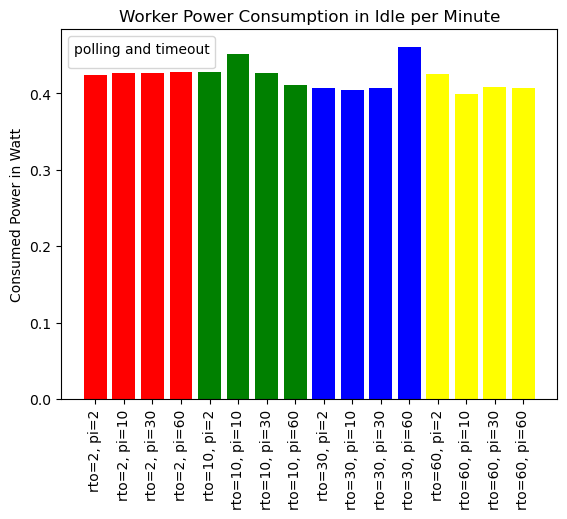

In [18]:
fig, ax = plt.subplots()

ax.bar(sum_power.columns, sum_power.loc['worker avg per min',:], color = colors)

ax.set_ylabel('Consumed Power in Watt')
ax.set_title('Worker Power Consumption in Idle per Minute')
ax.legend(title='polling and timeout')
plt.xticks(rotation='vertical')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


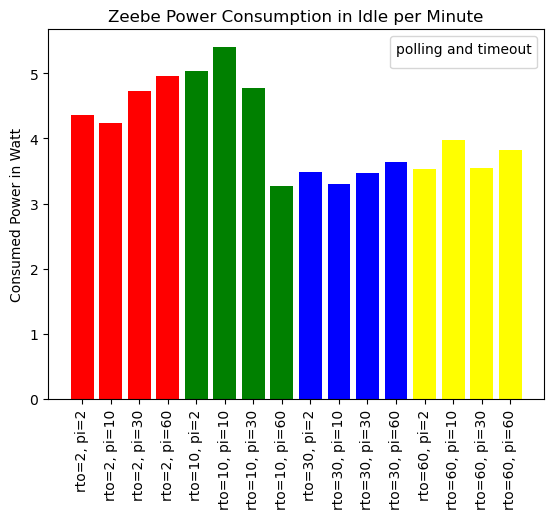

In [19]:
fig, ax = plt.subplots()

ax.bar(sum_power.columns, sum_power.loc['zeebe avg per min',:], color = colors)

ax.set_ylabel('Consumed Power in Watt')
ax.set_title('Zeebe Power Consumption in Idle per Minute')
ax.legend(title='polling and timeout')
plt.xticks(rotation='vertical')

plt.show()

[4.36378929 4.23593953 4.72605    4.95924651 5.033608   5.40235429
 4.77982917 3.26788889 3.49075273 3.30237049 3.4642     3.64046977
 3.52752558 3.96832857 3.54802564 3.82312453]


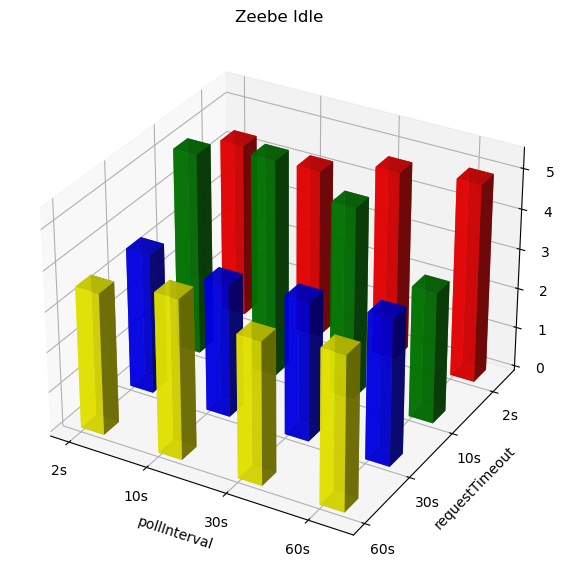

In [20]:
# Data for the 3D bar chart
x_data = ["2s","10s", "30s","60s"]
y_data = ["2s", "10s", "30s", "60s"]
y_data.reverse()
z_data = zeebe_avg_power

# Convert data to numpy arrays for plotting
x_pos = np.arange(len(x_data))
y_pos = np.arange(len(y_data))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
y_pos = np.flip(y_pos)
z_pos = np.zeros_like(x_pos)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Bar chart plotting
dx = dy = 0.3  # Width and depth of bars
dz = np.array(z_data).flatten()

print(dz)

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, alpha = 0.8)

# Setting labels for axes
ax.set_xticks(np.arange(len(x_data)) )
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(y_data)) )
ax.set_yticklabels(y_data)
ax.set_xlabel('pollInterval')
ax.set_ylabel('requestTimeout')
ax.set_zlabel('Power Consumption')

plt.title('Zeebe Idle')
plt.show()

[[0.42396429 0.42656279 0.42690909 0.42785581]
 [0.428112   0.45129429 0.42601667 0.40997333]
 [0.40653818 0.40423279 0.40624186 0.46023256]
 [0.42529767 0.39855714 0.40830513 0.40708679]]


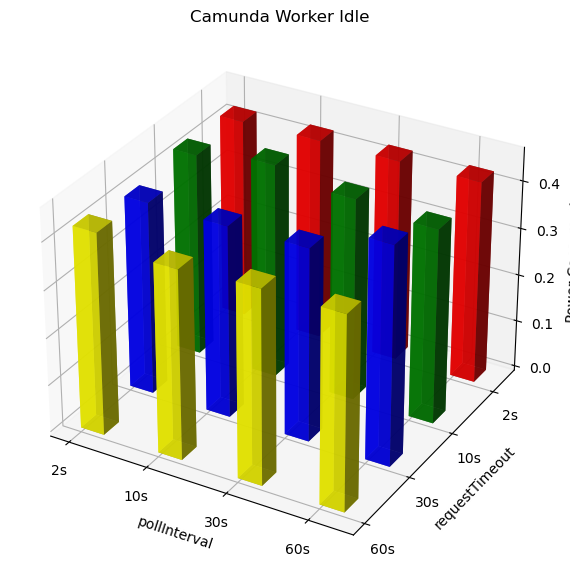

In [21]:
# Data for the 3D bar chart
x_data = ["2s","10s", "30s","60s"]
y_data = ["2s", "10s", "30s", "60s"]
y_data.reverse()
z_data = worker_avg_power

# Convert data to numpy arrays for plotting
x_pos = np.arange(len(x_data))
y_pos = np.arange(len(y_data))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
y_pos = np.flip(y_pos)
z_pos = np.zeros_like(x_pos)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Bar chart plotting
dx = dy = 0.3  # Width and depth of bars
dz = np.array(z_data).flatten()

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color= colors, alpha= 0.8)
print(z_data)

# Setting labels for axes
ax.set_xticks(np.arange(len(x_data)))
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(y_data)))
ax.set_yticklabels(y_data)
ax.set_xlabel('pollInterval')
ax.set_ylabel('requestTimeout')
ax.set_zlabel('Power Consumption')

plt.title('Camunda Worker Idle')
plt.show()